<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/GAS-DZ.4/GAZ_DZ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

Определить собственные частоты колебаний пакета лопаток в динамических условиях и построить вибрационную диаграмму для А0, A1, B0 форм колебаний на одном графике и сделать **вывод**. Средний диаметр ступени 1.25 м. Длинна рабочей лопатки 0.15 м. Площадь сечения лопатки 19.44 * 10е-4 м2. Момент инерции 1.43 * 10e-8 м4 $beta_y$ = 75. Плотность стали 12Х13 8000 кг/м3. Модуль упругости Е=2 * 10е11 Па. Число рабочих лопаток z=84. Размер бандажной ленты 60 х 5 мм. Число лопаток в пакете m = 8. Шаг по бандажу = 25 мм. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

MPa = 1e6
kW = 1e3
MW = 1e6
mm = 1e-3

m = 8
t = 25 * mm

beta = 75
density = 8000
E = 2 * (10**11)
z = 84
d = 1.25
l = 0.15
f = 19.44 * (10 ** (-4)) #Площадь сечения лопатки
J = 1.43 * (10 ** (-8))
#Размер бандажной ленты
delta = 5 * mm
B = 60 * mm 

i = (J / f) ** 0.5

_lambda = l / i
_lambda

55.30588810191244

In [2]:
psi = 0.98

In [3]:
def static_frequency(i):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82
 
    }
    first = psi * _m[i] / (l ** 2)
    second = ((E * J) / (density * f)) ** 0.5
    return first * second  

In [4]:
static_frequency(1), static_frequency(2), static_frequency(3)

(330.7664691980739, 2073.196976580784, 5800.226299151937)

In [6]:
H = 0.12
J_b = B * (delta ** 3) / 12

k = (12 * (m - 1) * H * E * J_b * l * np.sin(np.deg2rad(beta)) ** 2) / (m * t * J * E)
k
nu = B * delta * t / (f * l)
nu
f_a0 = static_frequency(1) * 0.8
f_a1 = static_frequency(1) * 6
f_b0 = static_frequency(1) * 4.2

f_a0, f_a1, f_b0  # Hz
B_bandage = 0.5 * ((d/l) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(beta)) ** 2
B_bandage
def to_dynamic_frequency(f, n=50):
    root = (1 + B_bandage * (n / f) ** 2) ** 0.5
    return f * root

In [7]:
to_dynamic_frequency(f_a0), to_dynamic_frequency(f_a1), to_dynamic_frequency(f_b0)

(292.8725752291112, 1988.5639718136847, 1394.8778142902904)

In [33]:
def min_max(f, delta=0.05):
    return f * (1-delta) , f * (1 + delta)
 
n_line = np.linspace(0, 60)
min_line, max_line = min_max(to_dynamic_frequency(f_a0, n=n_line))
min_line1, max_line1 = min_max(to_dynamic_frequency(f_a1, n=n_line))
min_line2, max_line2 = min_max(to_dynamic_frequency(f_b0, n=n_line))

def k_line(k, n=n_line):
    return k * n_line

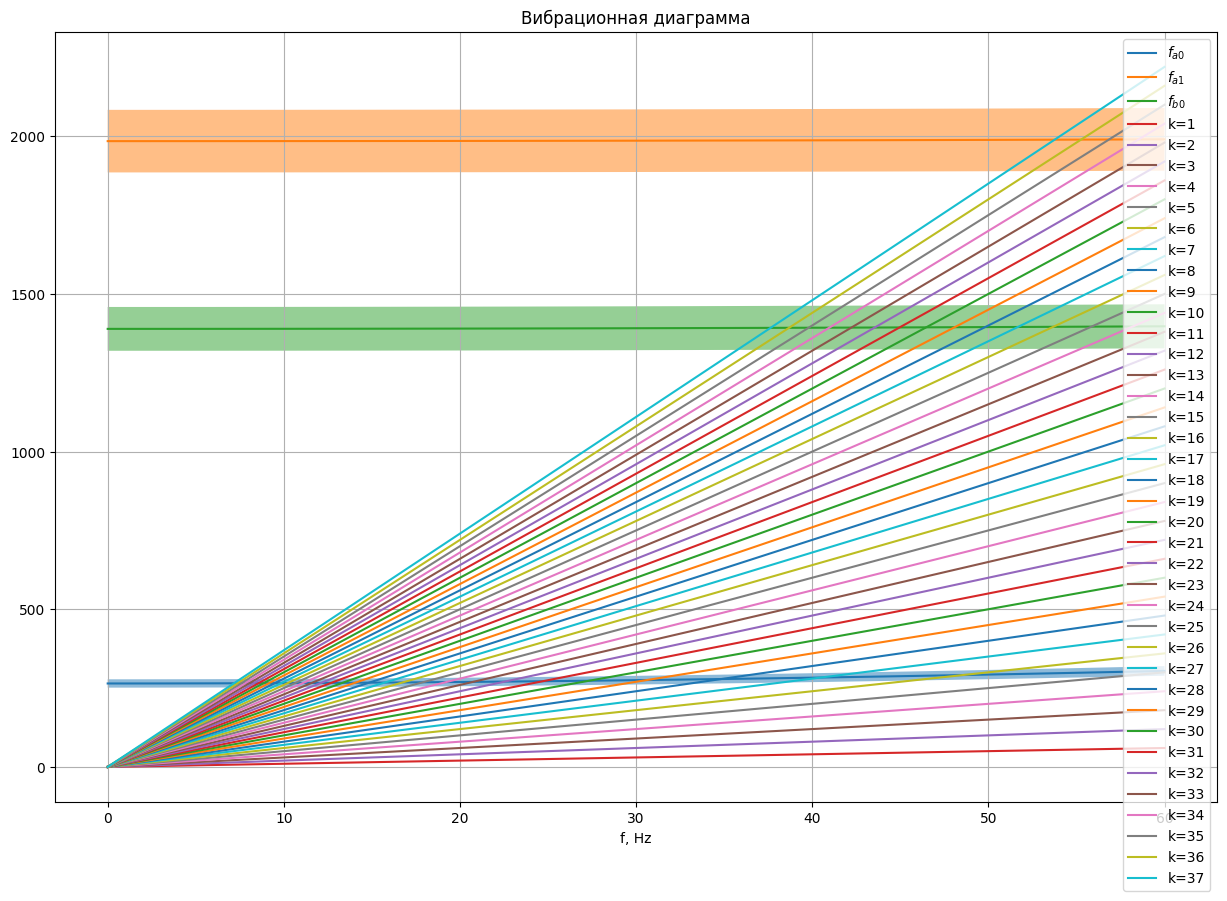

In [38]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(n_line, to_dynamic_frequency(f_a0, n=n_line), label='$f_{a0}$')
ax.plot(n_line, to_dynamic_frequency(f_a1, n=n_line), label='$f_{a1}$')
ax.plot(n_line, to_dynamic_frequency(f_b0, n=n_line), label='$f_{b0}$')
ax.fill_between(n_line, y1=min_line, y2=max_line, alpha=0.5)
ax.fill_between(n_line, y1=min_line1, y2=max_line1, alpha=0.5)
ax.fill_between(n_line, y1=min_line2, y2=max_line2, alpha=0.5)

ax.plot(n_line, k_line(1), label=f'k={1}')
ax.plot(n_line, k_line(2), label=f'k={2}')
ax.plot(n_line, k_line(3), label=f'k={3}')
ax.plot(n_line, k_line(4), label=f'k={4}')
ax.plot(n_line, k_line(5), label=f'k={5}')
ax.plot(n_line, k_line(6), label=f'k={6}')
ax.plot(n_line, k_line(7), label=f'k={7}')
ax.plot(n_line, k_line(8), label=f'k={8}')
ax.plot(n_line, k_line(9), label=f'k={9}')
ax.plot(n_line, k_line(10), label=f'k={10}')
ax.plot(n_line, k_line(11), label=f'k={11}')
ax.plot(n_line, k_line(12), label=f'k={12}')
ax.plot(n_line, k_line(13), label=f'k={13}')
ax.plot(n_line, k_line(14), label=f'k={14}')
ax.plot(n_line, k_line(15), label=f'k={15}')
ax.plot(n_line, k_line(16), label=f'k={16}')
ax.plot(n_line, k_line(17), label=f'k={17}')
ax.plot(n_line, k_line(18), label=f'k={18}')
ax.plot(n_line, k_line(19), label=f'k={19}')
ax.plot(n_line, k_line(20), label=f'k={20}')
ax.plot(n_line, k_line(21), label=f'k={21}')
ax.plot(n_line, k_line(22), label=f'k={22}')
ax.plot(n_line, k_line(23), label=f'k={23}')
ax.plot(n_line, k_line(24), label=f'k={24}')
ax.plot(n_line, k_line(25), label=f'k={25}')
ax.plot(n_line, k_line(26), label=f'k={26}')
ax.plot(n_line, k_line(27), label=f'k={27}')
ax.plot(n_line, k_line(28), label=f'k={28}')
ax.plot(n_line, k_line(29), label=f'k={29}')
ax.plot(n_line, k_line(30), label=f'k={30}')
ax.plot(n_line, k_line(31), label=f'k={31}')
ax.plot(n_line, k_line(32), label=f'k={32}')
ax.plot(n_line, k_line(33), label=f'k={33}')
ax.plot(n_line, k_line(34), label=f'k={34}')
ax.plot(n_line, k_line(35), label=f'k={35}')
ax.plot(n_line, k_line(36), label=f'k={36}')
ax.plot(n_line, k_line(37), label=f'k={37}')

ax.set_xlabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");